## PA3.5(b) - Transfer Learning

### Use TL to replace encoder layer of FCN

In [ ]:
## Data generation

In [1]:
from tl_fcn import *
from utils import *
import torch.optim as optim
import time
from torch.utils.data import DataLoader
import torch
import gc
import copy
from dataloader_4 import *
from starter_4 import *

in starter_4
GPU_STATUS: True


In [ ]:
# Precomputed Class Weights
class_weights = torch.FloatTensor([1.7796e-01, 6.1295e-01, 4.1182e-02, 8.9837e-03, 1.0163e-01, 6.8722e-03,
        1.4485e-03, 1.5937e-04, 4.7746e-02, 1.0698e-03])

In [ ]:
#hyper param
epochs = 30   
lr = 0.0004
criterion = nn.CrossEntropyLoss(weight=class_weights, reduction="mean")# Choose an appropriate loss function from https://pytorch.org/docs/stable/_modules/torch/nn/modules/loss.html
n_class = 10

print("creating model...")
fcn_model = FCN(n_class=n_class)
fcn_model.apply(init_weights)

# gpu
gpu_status = torch.cuda.is_available()
print("GPU:", gpu_status)

if gpu_status : 
    device = torch.device('cuda') # determine which device to use (gpu or cpu)
else : 
    device = torch.device('cpu')

fcn_model.to(device)
    
print("Training...")
val(fcn_model, 0)  # show the accuracy before training
model_name="latest_model_5b"
train_loss_record, valid_loss_record = train(fcn_model, epochs,lr, save_fp=model_name) 

In [ ]:
latest_fcn_model = torch.load(model_name)
latest_fcn_model.to(device)
test(latest_fcn_model)

In [ ]:
# Plot
plt.plot(np.arange(epochs), train_loss_record, label= "Training Loss")
plt.plot(np.arange(epochs), valid_loss_record, label="Validation Loss")
plt.xlabel("Epoches")
plt.ylabel("Loss")
plt.legend()
plt.title("5(b) Transfer Learning w/ Resnet34 Replacing Encoder in FCN")
plt.savefig("plots/Q5_b")
plt.show()

/opt/conda/lib/python3.9/site-packages/torchvision/transforms/functional.py:114: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  img = torch.from_numpy(pic.transpose((2, 0, 1))).contiguous()


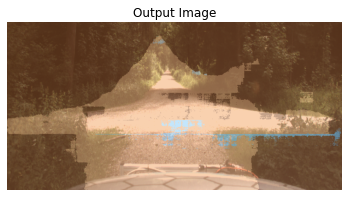

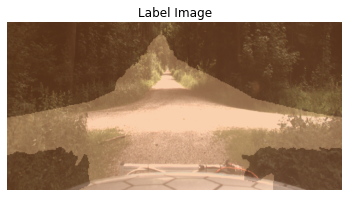

0

In [2]:
test_dataset = TASDataset('tas500v1.1', eval_mode=True, mode='test')
test_loader = DataLoader(dataset=test_dataset, batch_size= batch_size, shuffle=False)
visualize("latest_model_5b", test_loader)